In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.logging.print_header()

dandelion==0.0.27.post2 pandas==1.1.3 numpy==1.18.5 matplotlib==3.3.2 networkx==2.5 scipy==1.4.1 skbio==0.5.6


In [3]:
os.getcwd()

'/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/notebooks'

In [4]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [6]:
# Read in B cell data
%time bdata = sc.read_h5ad('h5ad/covid_jan_2021_bcells.h5ad')
bdata

CPU times: user 6.17 s, sys: 402 ms, total: 6.57 s
Wall time: 6.55 s


AnnData object with n_obs × n_vars = 74437 × 1051
    obs: 'Site', 'doublet', 'patient_id', 'sample_id', 'batch', 'Resample', 'Collection_Day', 'Sex', 'Age', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'leiden', 'consensus', 'initial_clustering', 'study_id', 'initial_clustering_B', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_B', 'celltype_B', 'celltype_B_v2', 'Status_on_day_collection_summary_v2', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr'
    var: 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'Status_on_day_collection_summary_v2_colors', 'bcr_QC_pass_colors'

In [8]:
# subset to each severity  classification
from collections import defaultdict
adata = defaultdict(dict)
vdj = defaultdict(dict)

In [10]:
# subset each status and place it in adata
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical']:
    adata[x] = bdata[bdata.obs['Status_on_day_collection_summary_v2'] == x].copy()
adata['Malignant'] = sc.read_h5ad('h5ad/combined_dec_bcell_vdj_malignant.h5ad')

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [19]:
vdj_files = {"Critical":'dandelion_output/covid_jan_2021_bcells_vdj_Critical.h5',
             "Severe":'dandelion_output/covid_jan_2021_bcells_vdj_Severe.h5',
             "Moderate":'dandelion_output/covid_jan_2021_bcells_vdj_Moderate.h5',
             "Mild":'dandelion_output/covid_jan_2021_bcells_vdj_Mild.h5',
             "Asymptomatic":'dandelion_output/covid_jan_2021_bcells_vdj_Asymptomatic.h5',
             "Healthy":'dandelion_output/covid_jan_2021_bcells_vdj_Healthy.h5',
             "Malignant":'dandelion_output/covid_jan_2021_bcells_malignant.h5'}

In [20]:
# also read in the vdj objects
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical', 'Malignant']:
    vdj[x] = ddl.read_h5(vdj_files[x])

In [28]:
study_dict = dict(zip(bdata.obs['patient_id'], bdata.obs['study_id']))
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical']:
    vdj[x].metadata['study_id'] = [study_dict[y] for y in vdj[x].metadata['patient_id']]
vdj['Malignant'].metadata['study_id'] = vdj['Malignant'].metadata['patient_id']

In [29]:
for x in vdj:
    ddl.tl.clone_diversity(vdj[x], groupby = 'study_id', metric = 'clone_centrality')

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by study_id is 38 (group COVID-068). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by study_id is 92 (group CV0059). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by study_id is 58 (group CV0050). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by study_id is 1 (group COVID-061). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by study_id is 58 (group CV0176). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by study_id is 75 (group CV0180). Exercise caution when interpreting diversity measures.


Computing gini indices for clone size using metadata and node closeness centrality using network.
Computing gini indices for clone size using metadata and node closeness centrality using network.


In [30]:
data = pd.DataFrame()
for x in vdj:
    data = data.append(vdj[x].metadata)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
pt_dict =dict(zip(data['sample_id'], data['Status_on_day_collection_summary']))
pt_dict.update({'CV0198':'Malignant'})
data['Status_on_day_collection_summary'] = [pt_dict[t] for t in data['sample_id']]

In [33]:
col_dict = {'Healthy':'#2ca02c',
'LPS':'#1f77b4',
'Non_covid':'#9467bd',
'Asymptomatic':'#fed976',
'Mild':'#fd8d3c',
'Moderate':'#e31a1c',
'Severe':'#800026',
'Critical':'#252525',
'Malignant':'#b7b7b7'}
col_dict2 = {'Male':'#d1d3d7',
             'Female':'#fca311'}

In [34]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [36]:
combine_dict ={'Healthy':'Control', 'Asymptomatic':'Control', 'Mild':'COVID symptomatic', 'Moderate':'COVID symptomatic', 'Severe':'COVID symptomatic', 'Critical':'COVID symptomatic', 'Non_covid':'Non_covid', 'LPS':'LPS', 'Malignant':'Malignant'}
data['status_combined']= [combine_dict[l] for l in data['Status_on_day_collection_summary']]

In [37]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
data1 = data[data['Status_on_day_collection_summary'].isin(['Healthy', 'Asymptomatic'])]
data2 = data[~(data['Status_on_day_collection_summary'].isin(['Healthy', 'LPS', 'Non_covid', 'Asymptomatic']))]

In [39]:
if not os.path.exists('figures/jointplot'):
    os.makedirs('figures/jointplot')

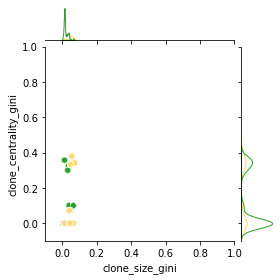

In [40]:
ax = sns.jointplot(y='clone_centrality_gini', x = "clone_size_gini", hue = 'Status_on_day_collection_summary', palette = col_dict, data = data1, xlim = (-0.1, 1), ylim = (-0.1,1), height = 4, marginal_kws={"alpha":0}, rasterized=True)
ax.ax_joint.get_legend().remove()
plt.savefig('figures/jointplot/control_gini_scatterv1_v2.pdf', dpi = 900)

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


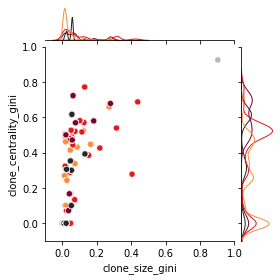

In [41]:
ax = sns.jointplot(y='clone_centrality_gini', x = "clone_size_gini", hue = 'Status_on_day_collection_summary', palette = col_dict, data = data2, xlim =(-0.1, 1), ylim = (-0.1,1), height = 4, marginal_kws={"alpha":0}, rasterized=True)
ax.ax_joint.get_legend().remove()
plt.savefig('figures/jointplot/covid_gini_scatterv1_v2.pdf', dpi = 900)

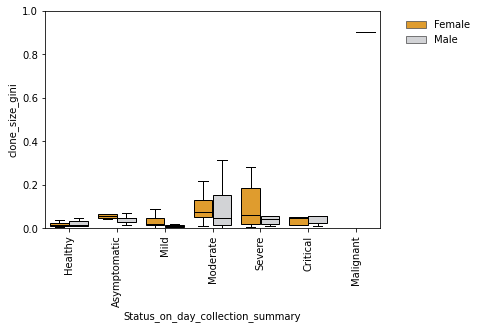

In [42]:
ax = sns.boxplot(y="clone_size_gini", x = 'Status_on_day_collection_summary', data = data, hue = 'Sex', palette = ['#fca311','#d1d3d7'], showfliers=False)
ax.set_ylim((0,1))
plt.setp(ax.artists, edgecolor = 'k', linewidth = 1)
plt.setp(ax.lines, color='k',linewidth = 1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False)
plt.savefig('figures/boxplot/clone_size_gini_v2_v2.pdf')

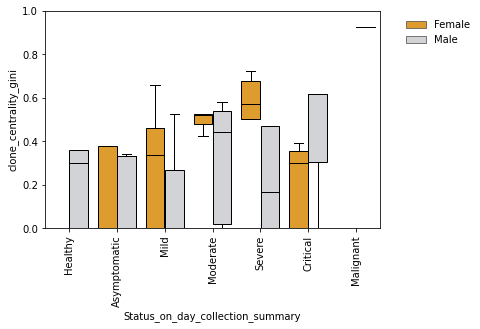

In [43]:
ax = sns.boxplot(y="clone_centrality_gini", x = 'Status_on_day_collection_summary', data = data, hue = 'Sex', palette = ['#fca311','#d1d3d7'], showfliers=False)
ax.set_ylim((0,1))
plt.setp(ax.artists, edgecolor = 'k', linewidth = 1)
plt.setp(ax.lines, color='k',linewidth = 1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False)
plt.savefig('figures/boxplot/centrality_gini_v2_v2.pdf')

In [44]:
from scipy import stats
all_t = list()
all_p = list()
for status in ['Healthy','Asymptomatic', 'Mild', 'Moderate','Severe','Critical']:
    sub_df = data[data.Status_on_day_collection_summary == status]
    g1 = sub_df[sub_df['Sex'] == 'Male']['clone_size_gini'].values
    g2 = sub_df[sub_df['Sex'] == 'Female']['clone_size_gini'].values
    _, p = stats.mannwhitneyu(g1, g2)
    t, _ = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

In [45]:
all_t

[3.372370123296996,
 -14.296555828101697,
 -14.800709242753156,
 -2.1195592347604513,
 -21.795730723079977,
 -9.508704241498947]

In [46]:
from dandelion.utilities import bh
import numpy as np

In [47]:
all_p

[4.212145903141852e-25,
 8.341502171406453e-18,
 1.5071762508325684e-255,
 2.6448929653778083e-86,
 1.9497890247612204e-124,
 1.3870952673828558e-43]

In [48]:
bh(np.array(all_p))

array([5.05457508e-025, 8.34150217e-018, 9.04305750e-255, 5.28978593e-086,
       5.84936707e-124, 2.08064290e-043])

In [49]:
from scipy import stats
all_t = list()
all_p = list()
for status in ['Healthy','Asymptomatic', 'Mild', 'Moderate','Severe','Critical']:
    sub_df = data[data.Status_on_day_collection_summary == status]
    g1 = sub_df[sub_df['Sex'] == 'Male']['clone_centrality_gini'].values
    g2 = sub_df[sub_df['Sex'] == 'Female']['clone_centrality_gini'].values
    _, p = stats.mannwhitneyu(g1, g2)
    t, _ = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

In [50]:
all_t

[44.257905858610826,
 6.0122348125934275,
 -33.67418464034698,
 -43.74218918231963,
 -39.86175611436786,
 31.412657228422983]

In [51]:
bh(np.array(all_p))

array([1.64645668e-269, 1.49808644e-001, 3.03583142e-205, 1.08704528e-183,
       0.00000000e+000, 6.19125815e-189])

In [52]:
for x in vdj:
    ddl.tl.clone_diversity(vdj[x], groupby = 'patient_id', use_contracted = True)

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by patient_id is 38 (group COVID-068). Exercise caution when interpreting diversity measures.


Computing Gini indices for cluster and vertex size using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by patient_id is 92 (group CV0059). Exercise caution when interpreting diversity measures.


Computing Gini indices for cluster and vertex size using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by patient_id is 58 (group CV0050). Exercise caution when interpreting diversity measures.


Computing Gini indices for cluster and vertex size using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by patient_id is 1 (group COVID-061). Exercise caution when interpreting diversity measures.


Computing Gini indices for cluster and vertex size using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by patient_id is 58 (group CV0176). Exercise caution when interpreting diversity measures.


Computing Gini indices for cluster and vertex size using network.


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/dandelion/tools/_diversity.py:299: UserWarning: The minimum cell numbers when grouped by patient_id is 75 (group CV0180). Exercise caution when interpreting diversity measures.


Computing Gini indices for cluster and vertex size using network.
Computing Gini indices for cluster and vertex size using network.


In [53]:
data = pd.DataFrame()
for x in vdj:
    data = data.append(vdj[x].metadata)

In [54]:
pt_dict =dict(zip(data['sample_id'], data['Status_on_day_collection_summary']))
pt_dict.update({'CV0198':'Malignant'})
data['Status_on_day_collection_summary'] = [pt_dict[t] for t in data['sample_id']]

In [55]:
col_dict = {'Healthy':'#2ca02c',
'LPS':'#1f77b4',
'Non_covid':'#9467bd',
'Asymptomatic':'#fed976',
'Mild':'#fd8d3c',
'Moderate':'#e31a1c',
'Severe':'#800026',
'Critical':'#252525',
'Malignant':'#b7b7b7'}
col_dict2 = {'Male':'#d1d3d7',
             'Female':'#fca311'}

In [56]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [57]:
combine_dict ={'Healthy':'Control', 'Asymptomatic':'Control', 'Mild':'COVID symptomatic', 'Moderate':'COVID symptomatic', 'Severe':'COVID symptomatic', 'Critical':'COVID symptomatic', 'Non_covid':'Non_covid', 'LPS':'LPS', 'Malignant':'Malignant'}
data['status_combined']= [combine_dict[l] for l in data['Status_on_day_collection_summary']]

In [58]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
data1 = data[data['Status_on_day_collection_summary'].isin(['Healthy', 'Asymptomatic'])]
data2 = data[~(data['Status_on_day_collection_summary'].isin(['Healthy', 'LPS', 'Non_covid', 'Asymptomatic']))]

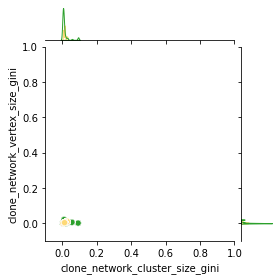

In [60]:
ax = sns.jointplot(y='clone_network_vertex_size_gini', x = "clone_network_cluster_size_gini", hue = 'Status_on_day_collection_summary', palette = col_dict, data = data1, xlim = (-0.1, 1), ylim = (-0.1,1), height = 4, marginal_kws={"alpha":0}, rasterized=True)
ax.ax_joint.get_legend().remove()
plt.savefig('figures/jointplot/control_gini_scatterv3_v2.pdf', dpi = 900)

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


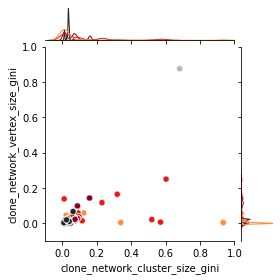

In [61]:
ax = sns.jointplot(y='clone_network_vertex_size_gini', x = "clone_network_cluster_size_gini", hue = 'Status_on_day_collection_summary', palette = col_dict, data = data2, xlim = (-0.1, 1), ylim = (-0.1,1), height = 4, marginal_kws={"alpha":0}, rasterized=True)
ax.ax_joint.get_legend().remove()
plt.savefig('figures/jointplot/covid_gini_scatterv3_v2.pdf',dpi = 900)

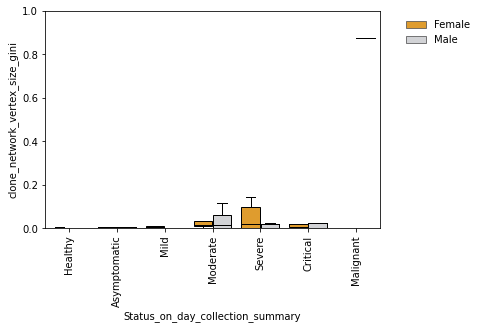

In [62]:
ax = sns.boxplot(y="clone_network_vertex_size_gini", x = 'Status_on_day_collection_summary', data = data, hue = 'Sex', palette = ['#fca311','#d1d3d7'], showfliers=False)
ax.set_ylim((0,1))
plt.setp(ax.artists, edgecolor = 'k', linewidth = 1)
plt.setp(ax.lines, color='k',linewidth = 1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False)
plt.savefig('figures/boxplot/vertex_size_gini_v3_v2.pdf')

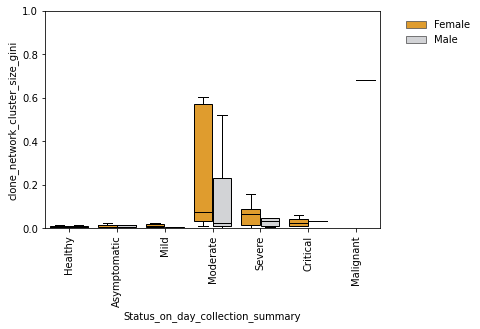

In [63]:
ax = sns.boxplot(y="clone_network_cluster_size_gini", x = 'Status_on_day_collection_summary', data = data, hue = 'Sex', palette = ['#fca311','#d1d3d7'], showfliers=False)
ax.set_ylim((0,1))
plt.setp(ax.artists, edgecolor = 'k', linewidth = 1)
plt.setp(ax.lines, color='k',linewidth = 1)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon = False)
plt.savefig('figures/boxplot/clone_size_gini_v3_v2.pdf')

In [64]:
from scipy import stats
all_t = list()
all_p = list()
for status in ['Healthy','Asymptomatic', 'Mild', 'Moderate','Severe','Critical']:
    sub_df = data[data.Status_on_day_collection_summary == status]
    g1 = sub_df[sub_df['Sex'] == 'Male']['clone_network_cluster_size_gini'].values
    g2 = sub_df[sub_df['Sex'] == 'Female']['clone_network_cluster_size_gini'].values
    _, p = stats.mannwhitneyu(g1, g2)
    t, _ = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

In [65]:
all_t

[7.360942000011471,
 -1.7988370978590082,
 -18.088757350028068,
 -33.83203032739706,
 -23.536344547683168,
 0.6596467574503233]

In [66]:
from dandelion.utilities import bh
import numpy as np

In [67]:
all_p

[0.3422735445978693,
 1.2761775098847783e-25,
 1.2852291409122593e-272,
 4.38018868922525e-170,
 1.9178222386179607e-113,
 0.2486608599270374]

In [68]:
bh(np.array(all_p))

array([3.42273545e-001, 1.91426626e-025, 7.71137485e-272, 1.31405661e-169,
       3.83564448e-113, 2.98393032e-001])

In [69]:
from scipy import stats
all_t = list()
all_p = list()
for status in ['Healthy','Asymptomatic', 'Mild', 'Moderate','Severe','Critical']:
    sub_df = data[data.Status_on_day_collection_summary == status]
    g1 = sub_df[sub_df['Sex'] == 'Male']['clone_network_vertex_size_gini'].values
    g2 = sub_df[sub_df['Sex'] == 'Female']['clone_network_vertex_size_gini'].values
    _, p = stats.mannwhitneyu(g1, g2)
    t, _ = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

In [70]:
all_t

[15.651165406160896,
 -1.9383306536845994,
 3.9195872703936385,
 -7.877362996544824,
 -20.347228923580634,
 -9.281443314689756]

In [71]:
from dandelion.utilities import bh
import numpy as np

In [72]:
all_p

[3.718672611480518e-58,
 0.2172045091039489,
 0.0,
 2.428082726505997e-49,
 1.3454620913844752e-53,
 0.0001972660824569506]

In [73]:
bh(np.array(all_p))

array([1.11560178e-57, 2.17204509e-01, 0.00000000e+00, 3.64212409e-49,
       2.69092418e-53, 2.36719299e-04])